# Import libs

In [2]:
import pandas as pd
import subprocess
import numpy as np
import json
import os

# Load .csv with all metadata from amtbd and preprocess it

You can download .csv file from [here](https://amtdb.org/samples) by navigating to the "Actions" section and downloading all metadata (see picture)

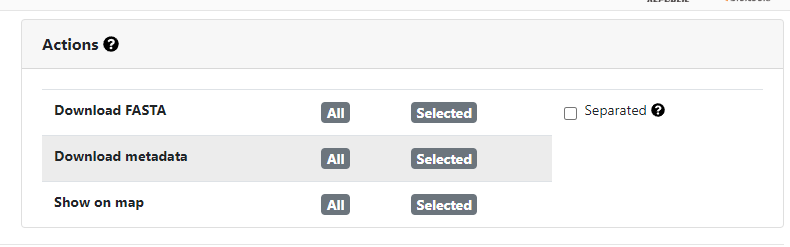

In [3]:
all_meta_df = pd.read_csv('amtdb_metadata.csv')
all_meta_df

,identifier,alternative_identifiers,country,continent,region,culture,epoch,group,comment,latitude,...,ychr_snps,avg_coverage,sequence_source,mitopatho_alleles,mitopatho_positions,mitopatho_locus,mitopatho_diseases,mitopatho_statuses,mitopatho_homoplasms,mitopatho_heteroplasms
0,RISE509,1622,Russia,Asia,Altai,Afanasievo,Bronze Age,BARu,NaN,54.580002,...,NaN,0.0,bam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RISE510,NaN,Russia,Asia,Altai,Afanasievo,Bronze Age,BARu,NaN,54.580002,...,NaN,0.0,bam,12705T,12705,MT-CO1,Possible protective factor for normal tension ...,Reported,NaN,NaN
2,RISE511,NaN,Russia,Asia,Altai,Afanasievo,Bronze Age,BARu,NaN,54.580002,...,NaN,0.0,bam,10398G;12372A;9055A;11467G;12308G,10398;12372;9055;11467;12308,MT-ND3;MT-ND5;MT-ATP6;MT-ND4;MT-TL2,PD protective factor / longevity / altered cel...,Reported / lineage L & M marker / also hg IJK;...,+;+;+;+;+,-;-;-;-;+
3,RISE507,NaN,Russia,Asia,Altai,Afanasievo,Bronze Age,BARu,NaN,51.500000,...,NaN,0.0,bam,4640A;11467G;12372A;150T;12308G,4640;11467;12372;150;12308,MT-ND2;MT-ND4;MT-ND5;MT-CR;MT-TL2,LHON / Epilepsy;Altered brain pH / sCJD patien...,Reported;Reported;Reported;Conflicting reports...,+;+;+;+;+,-;-;-;+;+
4,RISE508,NaN,Russia,Asia,Altai,Afanasievo,Bronze Age,BARu,NaN,51.500000,...,NaN,0.0,bam,12372A;12308G;13637G;11467G,12372;12308;13637;11467,MT-ND5;MT-TL2;MT-ND5;MT-ND4,Altered brain pH / sCJD patients;CPEO / Stroke...,Reported;Reported;Reported;Reported,+;+;+;+,-;+;-;-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,SX26,NaN,Switzerland,Europe,central Europe,Switzerland_Neolithic,Neolithic,NESw,Final Neolithic/Early Bronze Age,47.450001,...,NaN,0.0,reconstructed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2537,SX29,NaN,Switzerland,Europe,central Europe,Grossgartach,Neolithic,NESw,Middle neolithic,48.554459,...,NaN,0.0,reconstructed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2538,SX30,NaN,Switzerland,Europe,central Europe,Grossgartach,Neolithic,NESw,Middle neolithic,48.554459,...,NaN,0.0,reconstructed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2539,SX32,NaN,Switzerland,Europe,central Europe,Rubane,Neolithic,NESw,Middle neolithic,48.554459,...,NaN,0.0,reconstructed,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
all_meta_df_selected = all_meta_df.loc[all_meta_df['sequence_source'] == 'bam']
all_meta_df_selected

,identifier,alternative_identifiers,country,continent,region,culture,epoch,group,comment,latitude,...,ychr_snps,avg_coverage,sequence_source,mitopatho_alleles,mitopatho_positions,mitopatho_locus,mitopatho_diseases,mitopatho_statuses,mitopatho_homoplasms,mitopatho_heteroplasms
0,RISE509,1622,Russia,Asia,Altai,Afanasievo,Bronze Age,BARu,NaN,54.580002,...,NaN,0.0,bam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RISE510,NaN,Russia,Asia,Altai,Afanasievo,Bronze Age,BARu,NaN,54.580002,...,NaN,0.0,bam,12705T,12705,MT-CO1,Possible protective factor for normal tension ...,Reported,NaN,NaN
2,RISE511,NaN,Russia,Asia,Altai,Afanasievo,Bronze Age,BARu,NaN,54.580002,...,NaN,0.0,bam,10398G;12372A;9055A;11467G;12308G,10398;12372;9055;11467;12308,MT-ND3;MT-ND5;MT-ATP6;MT-ND4;MT-TL2,PD protective factor / longevity / altered cel...,Reported / lineage L & M marker / also hg IJK;...,+;+;+;+;+,-;-;-;-;+
3,RISE507,NaN,Russia,Asia,Altai,Afanasievo,Bronze Age,BARu,NaN,51.500000,...,NaN,0.0,bam,4640A;11467G;12372A;150T;12308G,4640;11467;12372;150;12308,MT-ND2;MT-ND4;MT-ND5;MT-CR;MT-TL2,LHON / Epilepsy;Altered brain pH / sCJD patien...,Reported;Reported;Reported;Conflicting reports...,+;+;+;+;+,-;-;-;+;+
4,RISE508,NaN,Russia,Asia,Altai,Afanasievo,Bronze Age,BARu,NaN,51.500000,...,NaN,0.0,bam,12372A;12308G;13637G;11467G,12372;12308;13637;11467,MT-ND5;MT-TL2;MT-ND5;MT-ND4,Altered brain pH / sCJD patients;CPEO / Stroke...,Reported;Reported;Reported;Reported,+;+;+;+,-;+;-;-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,N44,NaN,Poland,Europe,central Europe,Corded Ware,Neolithic,CWC,NaN,52.619999,...,NaN,53.0,bam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2439,N45,NaN,Poland,Europe,central Europe,Corded Ware,Neolithic,CWC,NaN,52.619999,...,ZS20,80.0,bam,8836G;4917G;16390A,8836;4917;16390,MT-ATP6;MT-ND2;MT-CR,LHON;LHON / Insulin Resistance / AMD / NRTI-PN...,Reported;Reported;Reported,+;+;+,-;-;-
2440,N47,NaN,Poland,Europe,central Europe,Corded Ware,Neolithic,CWC,NaN,52.619999,...,Z381,74.0,bam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2441,N49,NaN,Poland,Europe,central Europe,Corded Ware,Neolithic,CWC,NaN,52.619999,...,CTS9183,76.0,bam,499A;310C;12297C;12372A;195C;12308G;15693C;11467G,499;310;12297;12372;195;12308;15693;11467,MT-CR;MT-CR;MT-TL2;MT-ND5;MT-CR;MT-TL2;MT-CYB;...,Endometriosis;Possible protective factor for n...,Reported;Reported;Reported;Reported;Reported;R...,+;<NA>;+;+;+;+;+;+,-;<NA>;+;-;+;+;-;-


In [5]:
needed_links = all_meta_df_selected.iloc[:, 23].unique()
needed_links

array(['https://www.ebi.ac.uk/ena/data/view/PRJEB9021',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB11450',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB12155',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB8448',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB13123',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB22629',
       'https://www.ncbi.nlm.nih.gov/sra/?term=SRP029640',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB6622',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB22652',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB6272',
       'http://www.ebi.ac.uk/ena/data/view/PRJEB23635',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB9783',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB11848',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB6090',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB11364',
       'https://www.ncbi.nlm.nih.gov/sra?term=SRP039766',
       'https://www.ebi.ac.uk/ena/data/view/ERP001144',
       'https://www.ebi.ac.uk/ena/da

In [6]:
len(needed_links)

90

# Drop all links from NCBI

In [7]:
mask = []
for i in range(len(needed_links)):
    if needed_links[i].split('.')[1] == 'ncbi':
        mask.append(False)
    else:
        mask.append(True)
needed_links_uk_only = needed_links[mask]

In [8]:
needed_links_uk_only

array(['https://www.ebi.ac.uk/ena/data/view/PRJEB9021',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB11450',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB12155',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB8448',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB13123',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB22629',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB6622',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB22652',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB6272',
       'http://www.ebi.ac.uk/ena/data/view/PRJEB23635',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB9783',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB11848',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB6090',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB11364',
       'https://www.ebi.ac.uk/ena/data/view/ERP001144',
       'https://www.ebi.ac.uk/ena/data/view/PRJEB18067',
       'https://www.ebi.ac.uk/ena/data/view/FN673705',
       'https://www.ebi.ac.uk/ena/data/vi

In [9]:
len(needed_links_uk_only)

75

In [10]:
os.mkdir('all_data_bam_json')

# Load all jsons that contain links to .bam files

In [11]:
bad_links = {'?term=SRP029640':'SRP029640',
             'PRJNA318237?show=reads':'PRJNA318237',
             'sra?term=PRJNA230689':'PRJNA230689',
             'sra?term=SRP039766':'SRP039766'}

In [12]:
for i in range(an := len(needed_links)):
    print(f'Done {i} / {an}')
    link_id = needed_links[i].split('/')[-1]
    if link_id in list(bad_links.keys()):
        link_id = bad_links[link_id]
    subprocess.run(['wget', f'https://www.ebi.ac.uk/ena/portal/api/filereport?accession={link_id}&result=read_run&fields=study_accession,sample_accession,experiment_accession,run_accession,tax_id,scientific_name,fastq_ftp,submitted_ftp,sra_ftp,bam_ftp&format=json&download=true&limit=0', '-O', f'./all_data_bam_json/{link_id}'])

Done 0 / 90
Done 1 / 90
Done 2 / 90
Done 3 / 90
Done 4 / 90
Done 5 / 90
Done 6 / 90
Done 7 / 90
Done 8 / 90
Done 9 / 90
Done 10 / 90
Done 11 / 90
Done 12 / 90
Done 13 / 90
Done 14 / 90
Done 15 / 90
Done 16 / 90
Done 17 / 90
Done 18 / 90
Done 19 / 90
Done 20 / 90
Done 21 / 90
Done 22 / 90
Done 23 / 90
Done 24 / 90
Done 25 / 90
Done 26 / 90
Done 27 / 90
Done 28 / 90
Done 29 / 90
Done 30 / 90
Done 31 / 90
Done 32 / 90
Done 33 / 90
Done 34 / 90
Done 35 / 90
Done 36 / 90
Done 37 / 90
Done 38 / 90
Done 39 / 90
Done 40 / 90
Done 41 / 90
Done 42 / 90
Done 43 / 90
Done 44 / 90
Done 45 / 90
Done 46 / 90
Done 47 / 90
Done 48 / 90
Done 49 / 90
Done 50 / 90
Done 51 / 90
Done 52 / 90
Done 53 / 90
Done 54 / 90
Done 55 / 90
Done 56 / 90
Done 57 / 90
Done 58 / 90
Done 59 / 90
Done 60 / 90
Done 61 / 90
Done 62 / 90
Done 63 / 90
Done 64 / 90
Done 65 / 90
Done 66 / 90
Done 67 / 90
Done 68 / 90
Done 69 / 90
Done 70 / 90
Done 71 / 90
Done 72 / 90
Done 73 / 90
Done 74 / 90
Done 75 / 90
Done 76 / 90
Done 77 /

In [13]:
list_of_files = os.listdir('./all_data_bam_json')
list_of_files

['SAMEA104354398',
 'PRJNA230689',
 'PRJNA354503',
 'SAMEA104354393',
 'SAMEA4877753',
 'SAMEA104354404',
 'PRJEB8448',
 'SAMEA104354399',
 'SAMEA104354383',
 'ERP001144',
 'SAMEA104354413',
 'SAMEA104354390',
 'SAMEA104354388',
 'SAMEA104354418',
 'SAMEA104354380',
 'SAMEA4877749',
 'PRJEB18067',
 'PRJEB6090',
 'SAMEA4877757',
 'SAMEA104354397',
 'SRX1629437',
 'SAMEA104354415',
 'SAMEA4877761',
 'PRJEB6272',
 'SRX1361561',
 'SAMEA4877755',
 'SRX1361424',
 'PRJEB11450',
 'SAMEA104354414',
 'SRX1361548',
 'SAMEA104354411',
 'SAMEA4877758',
 'SAMEA104354403',
 'SRP039766',
 'SRX3542065',
 'PRJEB13123',
 'SAMEA104354419',
 'PRJEB15464',
 'PRJEB12155',
 'SAMEA104354416',
 'SAMEA104354396',
 'SAMEA104354408',
 'SAMEA4877760',
 'SAMEA104354384',
 'PRJEB21279',
 'PRJNA318237',
 'SAMEA4877750',
 'SAMEA104354386',
 'PRJEB9021',
 'SRA291772',
 'FN673705',
 'PRJEB23635',
 'SAMEA104354391',
 'SAMEA104354381',
 'PRJEB6622',
 'PRJEB11364',
 'PRJEB22629',
 'SAMEA104354387',
 'SRX3542052',
 'SAMEA487

# Parse json

In [14]:
all_bam_links = []
broken_files = []
for i in range(len(list_of_files)):
    current_file = list_of_files[i]
    with open('./all_data_bam_json/'+current_file, 'r') as f:
        lines = f.readlines()
    if len(lines) <= 2:
        print(f'No data in file {list_of_files[i]} !!!')
        broken_files.append(list_of_files[i])
    else:
        for j in range(1, len(lines), 2):
            curr_links = json.loads(lines[j])['submitted_ftp']
            if len(curr_links) != 0:
                curr_bam_link = curr_links.split(';')[0]
                if curr_bam_link[-3:] == 'bam':
                    print(curr_bam_link)
                    all_bam_links.append(curr_bam_link)

ftp.sra.ebi.ac.uk/vol1/run/ERR217/ERR2178267/NW255a.full-hg19.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR217/ERR2178308/NW255a.MT-rCRS.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR217/ERR2178262/Alh3a.full-hg19.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR217/ERR2178303/Alh3a.MT-rCRS.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR350/ERR3503729/Koszyce-3_5_final.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR217/ERR2178273/STR241.full-hg19.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR217/ERR2178312/STR241.MT-rCRS.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR769/ERR769583/I0061.390k.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR769/ERR769587/I0013.390k.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR769/ERR769592/I0174.390k.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR769/ERR769599/I0054.390k.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR769/ERR769601/I0057.390k.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR769/ERR769604/I0795.390k.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR769/ERR769607/I0410.390k.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR769/ERR769609/I0413.390k.bam
ftp.sra.ebi.ac.uk/vol1/run/ERR769/ERR769614/I0405.390k.bam
ftp.sra.ebi.ac

In [15]:
broken_files

['FN673705']

In [16]:
os.mkdir('all_bams')

# Load all .bam files

In [17]:
for i in range(an := len(all_bam_links)):
    print(f'Done {i} / {an}')
    subprocess.run(['wget', '-P', './all_bams', all_bam_links[i]])

Done 0 / 3256


KeyboardInterrupt: ignored